In [365]:
import networkx as nx
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import community

In [366]:
hashtagsweek1 = ['#FridayNightatPortlandRow', '#HauntedWatchParty', '#WatchPartyatPortlandRow', '#HauntedbyaType3','#TogetherForLockwoodandCo','#PrimeForLockwoodandCo','#BringBackLockwoodandCo']
hashtagsweek2 = ['#GhostHuntersWatchParty', '#DisneyForLockwoodandCo', '#BBCforLockwoodandCo', '#AppleTVforLockwoodandCo', '#PrimeForLockwoodandCo', '#JustRecklessEnough']
hashtagsweek3 = ['#LockwoodGhostAuditions', '#ParamountForLockwoodandCo', '#ScullandCo','#RapiersReady', '#CaringforCarlyle', '#DEPRACisOnTheWay', '#BunsForBunchurch']
hashtagsweek4 = ['#CompleteFictionAppreciation', '#DisneySaveLockwood', '#ArtistryofLockwoodandCo', '#ParamountSaveLockwood', '#GhostStrike', '#LockwoodParallelFandoms', '#JustRecklessEnough']
hashtagsweek5 = ['#StroudsAppreciation', '#VoteLockwoodforNFA', '#PrimeSaveLockwood', '#ScreamingStaircase', '#DEPRACrollcall', '#LivingforLockwood', '#RapiersReady']
hashtagsweek6 = ['#LockNationAppreciation', '#LockNationArtistsandGiftsDay', '#LockNationEditorsDay', '#LockNationFicWritersDay', '#LockNationComediansDay', '#GhostLockAwards']
hashtagsall = hashtagsweek1+hashtagsweek2+hashtagsweek3+hashtagsweek4 + hashtagsweek5
hashtagsall = list(set(hashtagsall))

In [367]:
# connect to the lnctweets.db
conn = sqlite3.connect('output/lnctweets.db')
#query the database to get the interaction for the original tweets for the hashtag #BringBackLockwoodandCo
query = '''
    SELECT u.from_, u.to_, COUNT(DISTINCT u.tweet_id) AS count
    FROM tweets AS t
    LEFT JOIN userinteraction AS u
        ON t.tweet_id = u.tweet_id
    WHERE t.week = "week5"
    GROUP BY u.from_, u.to_
    HAVING count>10
    ORDER BY count DESC;
'''
working_df = pd.read_sql_query(query,conn)

'''

        AND t.retweet = "False"
'''
working_df['count'].value_counts()

11     40
12     36
14     29
13     21
15     21
       ..
62      1
59      1
51      1
48      1
408     1
Name: count, Length: 65, dtype: int64

In [368]:
filter_out = ['2','A','App','AppleSupport','AppleTV','AppleTVI','AppleTVPlus','AppleTVUK','BB','BBC','BBCO','BBC','BBCOn', 'BBCOne', 'BBCPlayer','BBCSounds', 'BBCR1',
                  'BBCSounds','BBCiPlayer','BBCone','D','Di','Dis','Disn', 'Disne', 'Dinsey',' DisneyChannel','DisneyHyperion','DisneyIT', 'DisneyP', 'DisneyChannel',
                  'DisneyHyperion','DisneyPlusUK', 'DisneyPlus', 'HBO', 'HBO_UK','NETFLIX', 'netflix', 'NETFLIXUK', 'Netflix', 'NetflixUK','ParamountPlus', 'ParamaountUK', 'ParamountPlusUK'
                  'Prime', 'PrimeUK', 'PrimeVideo', 'primevideouk', 'disneyplusuk', 'primevideo','bbc','paramountplus','ParamountPlusUK']
working_df = working_df[~working_df['from_'].isin(filter_out)]
working_df = working_df[~working_df['to_'].isin(filter_out)]                            
print(working_df[working_df['from_'].isin(filter_out)])
print(working_df[working_df['to_'].isin(filter_out)])
working_df

Empty DataFrame
Columns: [from_, to_, count]
Index: []
Empty DataFrame
Columns: [from_, to_, count]
Index: []


,from_,to_,count
0,Godsgirljune,AnittaBloom,408
1,AnittaBloom,Godsgirljune,311
2,Godsgirljune,lavenderghostco,296
3,kabitanaik29,lavenderghostco,208
4,lavenderghostco,Godsgirljune,144
...,...,...,...
407,learmn83,nemesisn15,11
408,lockeybae,cassiesnowberry,11
409,vel_electric,MontaguBarnes,11
410,ysabellabee,lavenderghostco,11


Degree Centrality:

    Degree centrality is a measure of the number of connections a node has in a network.
    It quantifies the importance or centrality of a node based on the number of direct connections it has.
    Nodes with high degree centrality are often considered influential or central within the network.
    Degree centrality is calculated by dividing the number of connections of a node by the total possible connections.

Betweenness Centrality:

    Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes in the network.
    It quantifies the control or influence a node has over the flow of information or resources in the network.
    Nodes with high betweenness centrality act as bridges or intermediaries between different parts of the network.
    Betweenness centrality is calculated by counting the number of shortest paths that pass through a node, normalized by the total number of shortest paths.

Closeness Centrality:

    Closeness centrality measures how quickly a node can interact with other nodes in the network.
    It quantifies how closely connected a node is to all other nodes in terms of geodesic distance (shortest path length).
    Nodes with high closeness centrality can reach other nodes more efficiently and have faster access to information or resources.
    Closeness centrality is calculated as the reciprocal of the average shortest path length from a node to all other nodes.

In summary, degree centrality focuses on the number of connections, betweenness centrality considers the node's position in facilitating communication between other nodes, and closeness centrality emphasizes the efficiency of a node's connections to all other nodes. Each centrality measure provides insights into different aspects of a node's importance or centrality within a network.

In [369]:
G = nx.from_pandas_edgelist(working_df, 'from_', 'to_', edge_attr='count')

# Centrality Analysis
degree_centralities = nx.degree_centrality(G)
# Step 3: Create a DataFrame from the centrality results
centrality_df = pd.DataFrame(degree_centralities.items(), columns=['User', 'Degree Centrality'])

# Step 4: Sort the DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Degree Centrality', ascending=False).reset_index()
centrality_df

,index,User,Degree Centrality
0,2,lavenderghostco,0.888889
1,0,Godsgirljune,0.454545
2,1,AnittaBloom,0.282828
3,15,amelia_argent,0.272727
4,7,cassiesnowberry,0.232323
...,...,...,...
95,66,AlinchenBee,0.010101
96,69,songofdarkness_,0.010101
97,71,LockwoodPodcast,0.010101
98,72,hollowtapes,0.010101


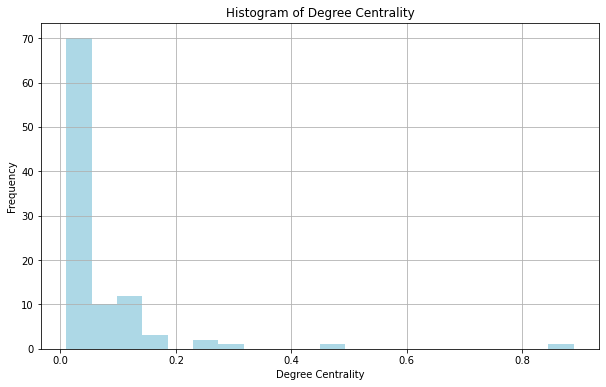

In [370]:
# Step 3: Create a histogram of the degree centrality
plt.figure(figsize=(10, 6))
plt.hist(centrality_df['Degree Centrality'], bins=20, color='lightblue')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Degree Centrality')
plt.grid(True)
plt.show()

In [371]:
# Betweenness Centrality
betweenness_centralities = nx.betweenness_centrality(G)
# Step 3: Create a DataFrame from the centrality results
betweenness_centrality_df = pd.DataFrame(betweenness_centralities.items(), columns=['User', 'Betweenness Centrality'])

# Step 4: Sort the DataFrame by centrality values in descending order
betweenness_centrality_df = betweenness_centrality_df.sort_values(by='Betweenness Centrality', ascending=False).reset_index()
betweenness_centrality_df

,index,User,Betweenness Centrality
0,2,lavenderghostco,0.721523
1,0,Godsgirljune,0.170377
2,15,amelia_argent,0.057373
3,1,AnittaBloom,0.034477
4,73,Iff_ustin,0.020348
...,...,...,...
95,64,NurseNerdAlert,0.000000
96,65,amazonlite2727,0.000000
97,34,ECiaffaraf38490,0.000000
98,67,BunchurchandCo,0.000000


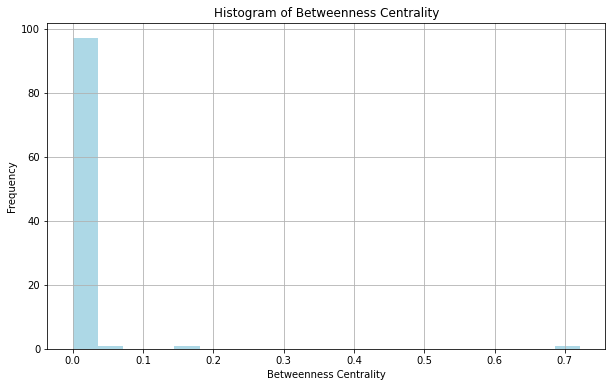

In [372]:
# Step 3: Create a histogram of the betweenness centrality
plt.figure(figsize=(10, 6))
plt.hist(betweenness_centrality_df['Betweenness Centrality'], bins=20, color='lightblue')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Betweenness Centrality')
plt.grid(True)
plt.show()

In [373]:
# Closeness Centrality
closeness_centralities = nx.closeness_centrality(G)
# Step 3: Create a DataFrame from the centrality results
closeness_centrality_df = pd.DataFrame(closeness_centralities.items(), columns=['User', 'Closeness Centrality'])

# Step 4: Sort the DataFrame by centrality values in descending order
closeness_centrality_df = closeness_centrality_df.sort_values(by='Closeness Centrality', ascending=False).reset_index()
closeness_centrality_df

,index,User,Closeness Centrality
0,2,lavenderghostco,0.883929
1,0,Godsgirljune,0.642857
2,1,AnittaBloom,0.575581
3,15,amelia_argent,0.572254
4,7,cassiesnowberry,0.559322
...,...,...,...
95,74,lockwoodandco13,0.375000
96,52,Valentini_Elly,0.373585
97,62,Vika20123k,0.365314
98,84,SaturnWidow,0.332215


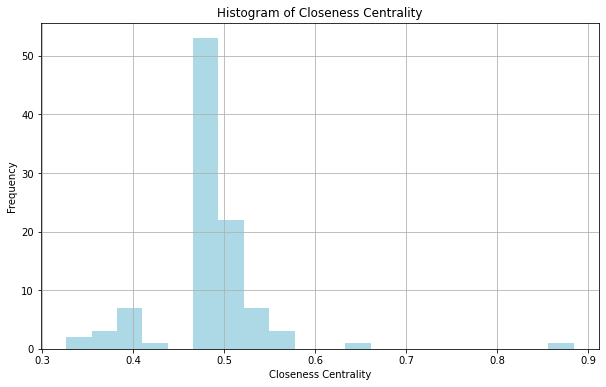

In [374]:
# Step 3: Create a histogram of the closeness centrality
plt.figure(figsize=(10, 6))
plt.hist(closeness_centrality_df['Closeness Centrality'], bins=20, color='lightblue')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Closeness Centrality')
plt.grid(True)
plt.show()

In [375]:
# Community partition

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

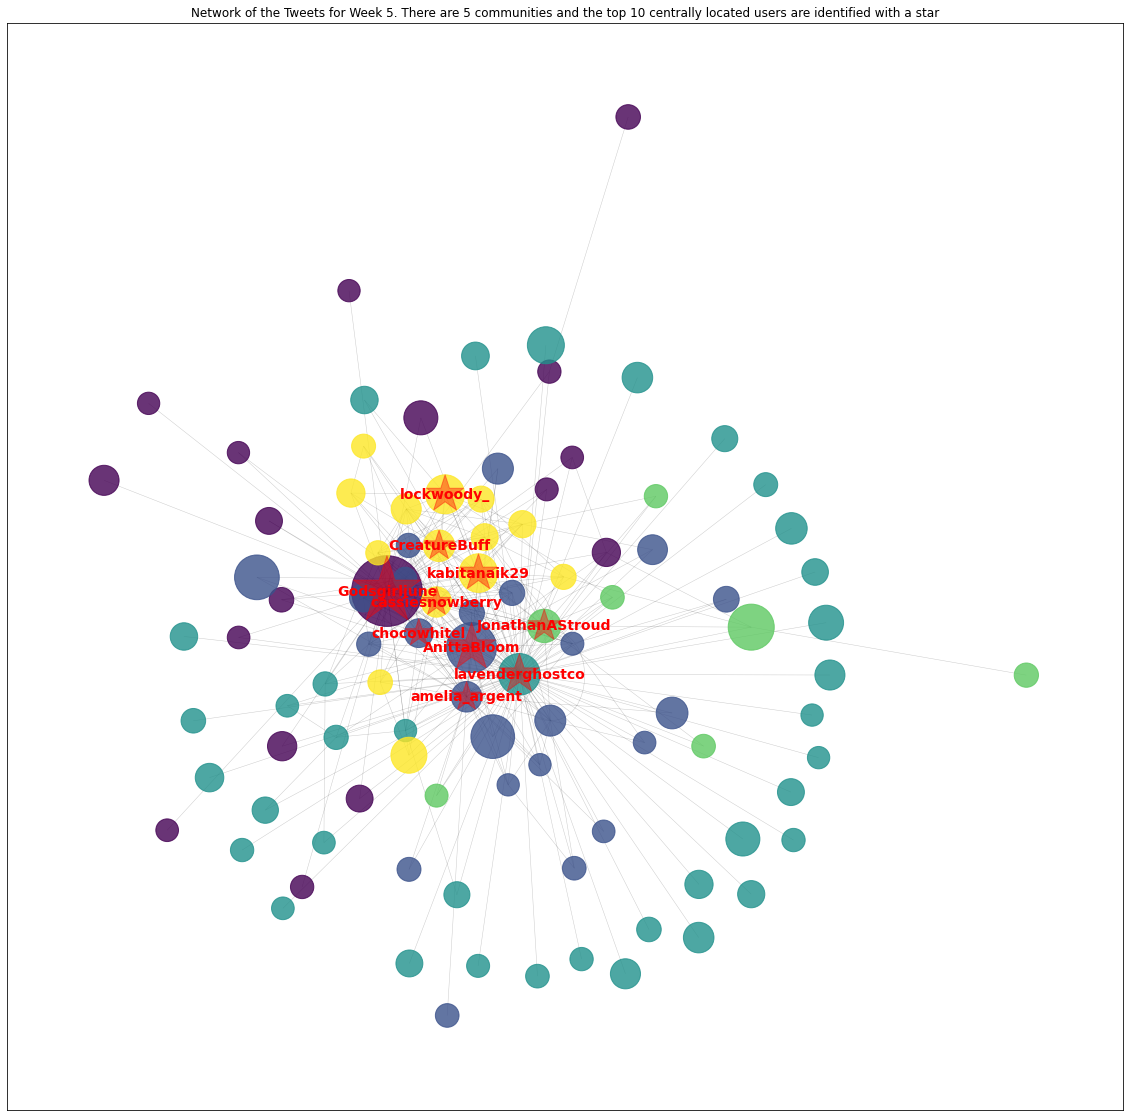

In [376]:
# Convert directed graph to undirected graph
Gu = G.to_undirected()

# Perform community detection using Louvain algorithm
partition = community.best_partition(Gu)

# Get the number of communities
num_communities = max(partition.values()) + 1

# Define a color map for communities
color_map = plt.cm.get_cmap('viridis', num_communities)

# Extract the edge attribute values
edge_sizes = [d['count'] for u, v, d in G.edges(data=True)]

# Normalize the edge sizes
min_size = min(edge_sizes)
max_size = max(edge_sizes)
normalized_sizes = [(size - min_size) / (max_size - min_size) for size in edge_sizes]

# Scale the normalized sizes to the desired range
desired_min_size = 500  # Minimum node size
desired_max_size = 5000  # Maximum node size
scaled_sizes = [size * (desired_max_size - desired_min_size) + desired_min_size for size in normalized_sizes]

# Create a dictionary to store node sizes based on labels
node_sizes = {node: size for node, size in zip(G.nodes, scaled_sizes)}

# Calculate degree centrality for each node
degree_centralities = nx.degree_centrality(G)

# Sort nodes based on degree centrality and get the top 10 nodes
top_10_nodes = sorted(degree_centralities, key=degree_centralities.get, reverse=True)[:10]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Draw the network with node color based on community and node size based on edge attribute
pos = nx.spring_layout(G, k=0.3)  # Adjust the value of k to control the spacing between nodes
for community_id in range(num_communities):
    nodes = [node for node, comm_id in partition.items() if comm_id == community_id]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color_map(community_id),
                           node_size=[node_sizes[node] for node in nodes],
                           alpha=0.8, ax=ax)

nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.2, ax=ax)

# Label the top 10 nodes based on degree centrality
labels = {node: node if node in top_10_nodes else '' for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_color='red', font_size=14, font_weight='bold', ax=ax)

# Identify the top 10 centrally located users with a star
star_nodes = [node for node in G.nodes if node in top_10_nodes]
nx.draw_networkx_nodes(G, pos, nodelist=star_nodes, node_shape='*',
                       node_color='red', node_size=[node_sizes[node] for node in star_nodes],
                       alpha=0.4, ax=ax)

# Add a title to the plot
plt.title(f'Network of the Tweets for Week 5. There are {num_communities} communities and the top 10 centrally located users are identified with a star')

# Show the plot
plt.show()

In [377]:
top_10_nodes

['lavenderghostco',
 'Godsgirljune',
 'AnittaBloom',
 'amelia_argent',
 'cassiesnowberry',
 'JonathanAStroud',
 'CreatureBuff',
 'chocowhitel',
 'lockwoody_',
 'kabitanaik29']